Dataset: https://drive.google.com/drive/folders/1EccN6etTweCuQePCNVz1D9BYrRUedyRZ?usp=sharing

# CNN for Brain Tumor Detection

In [ ]:
import numpy as np
import pandas as pd

import os
import sys

from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/brain-mri-images')
sys.path.append('/content/drive/My Drive/brain-mri-images')
folder_path = '/content/drive/My Drive/brain-mri-images'
No_Tumor_Img = os.listdir(folder_path + '/no/')
Tumor_Img = os.listdir(folder_path + '/yes/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


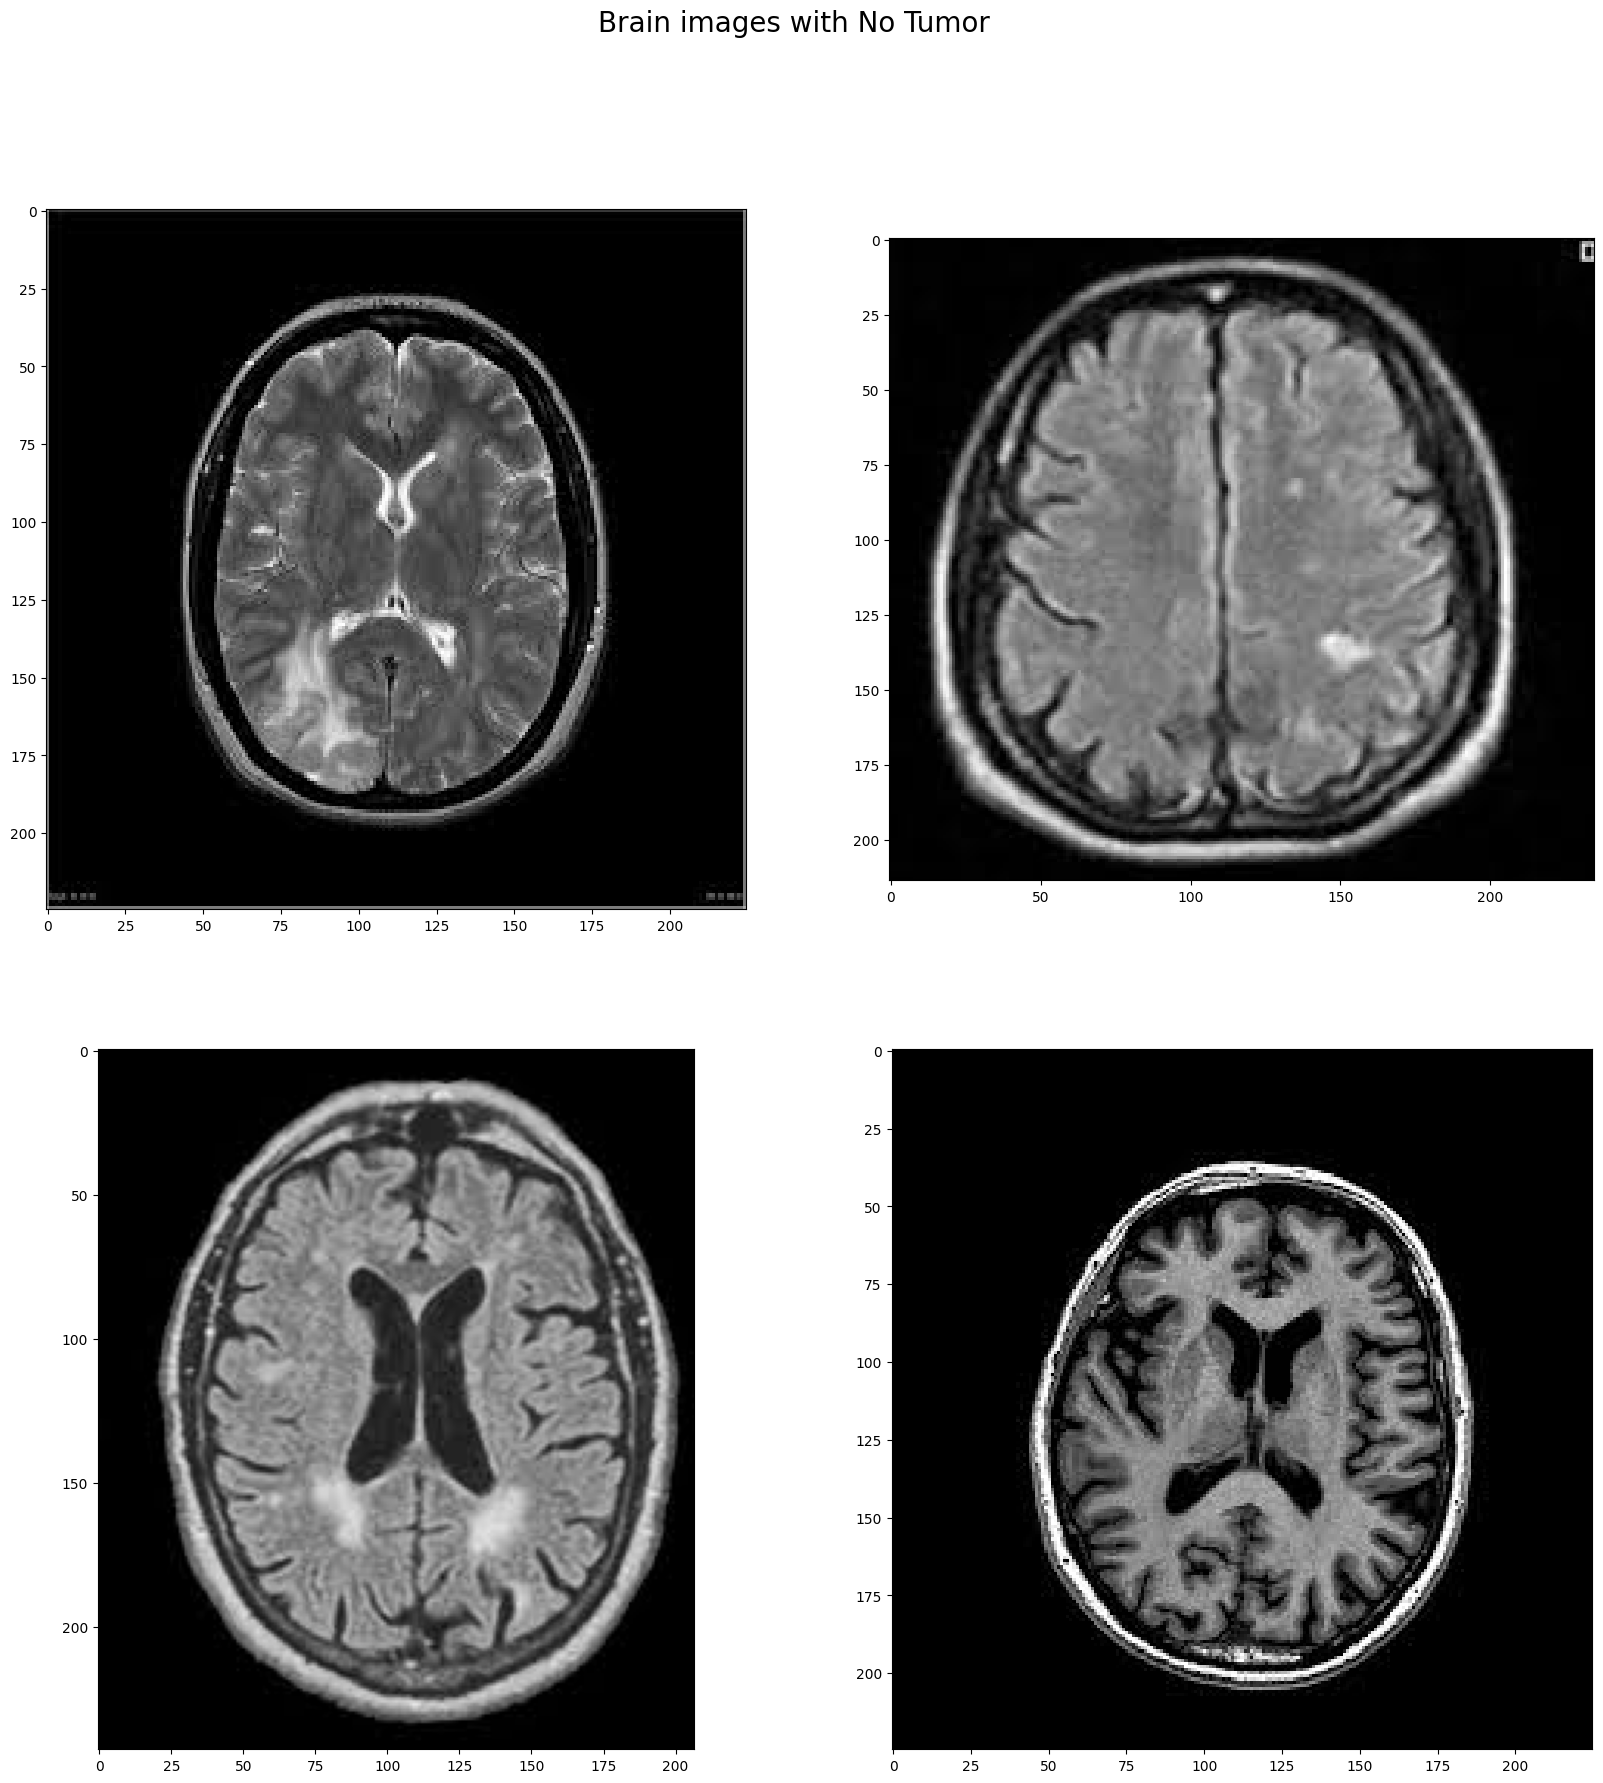

In [ ]:
import cv2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = cv2.imread(folder_path + '/no/'+ No_Tumor_Img[i])
    plt.imshow(img)
plt.suptitle("Brain images with No Tumor",fontsize=20)
plt.show()

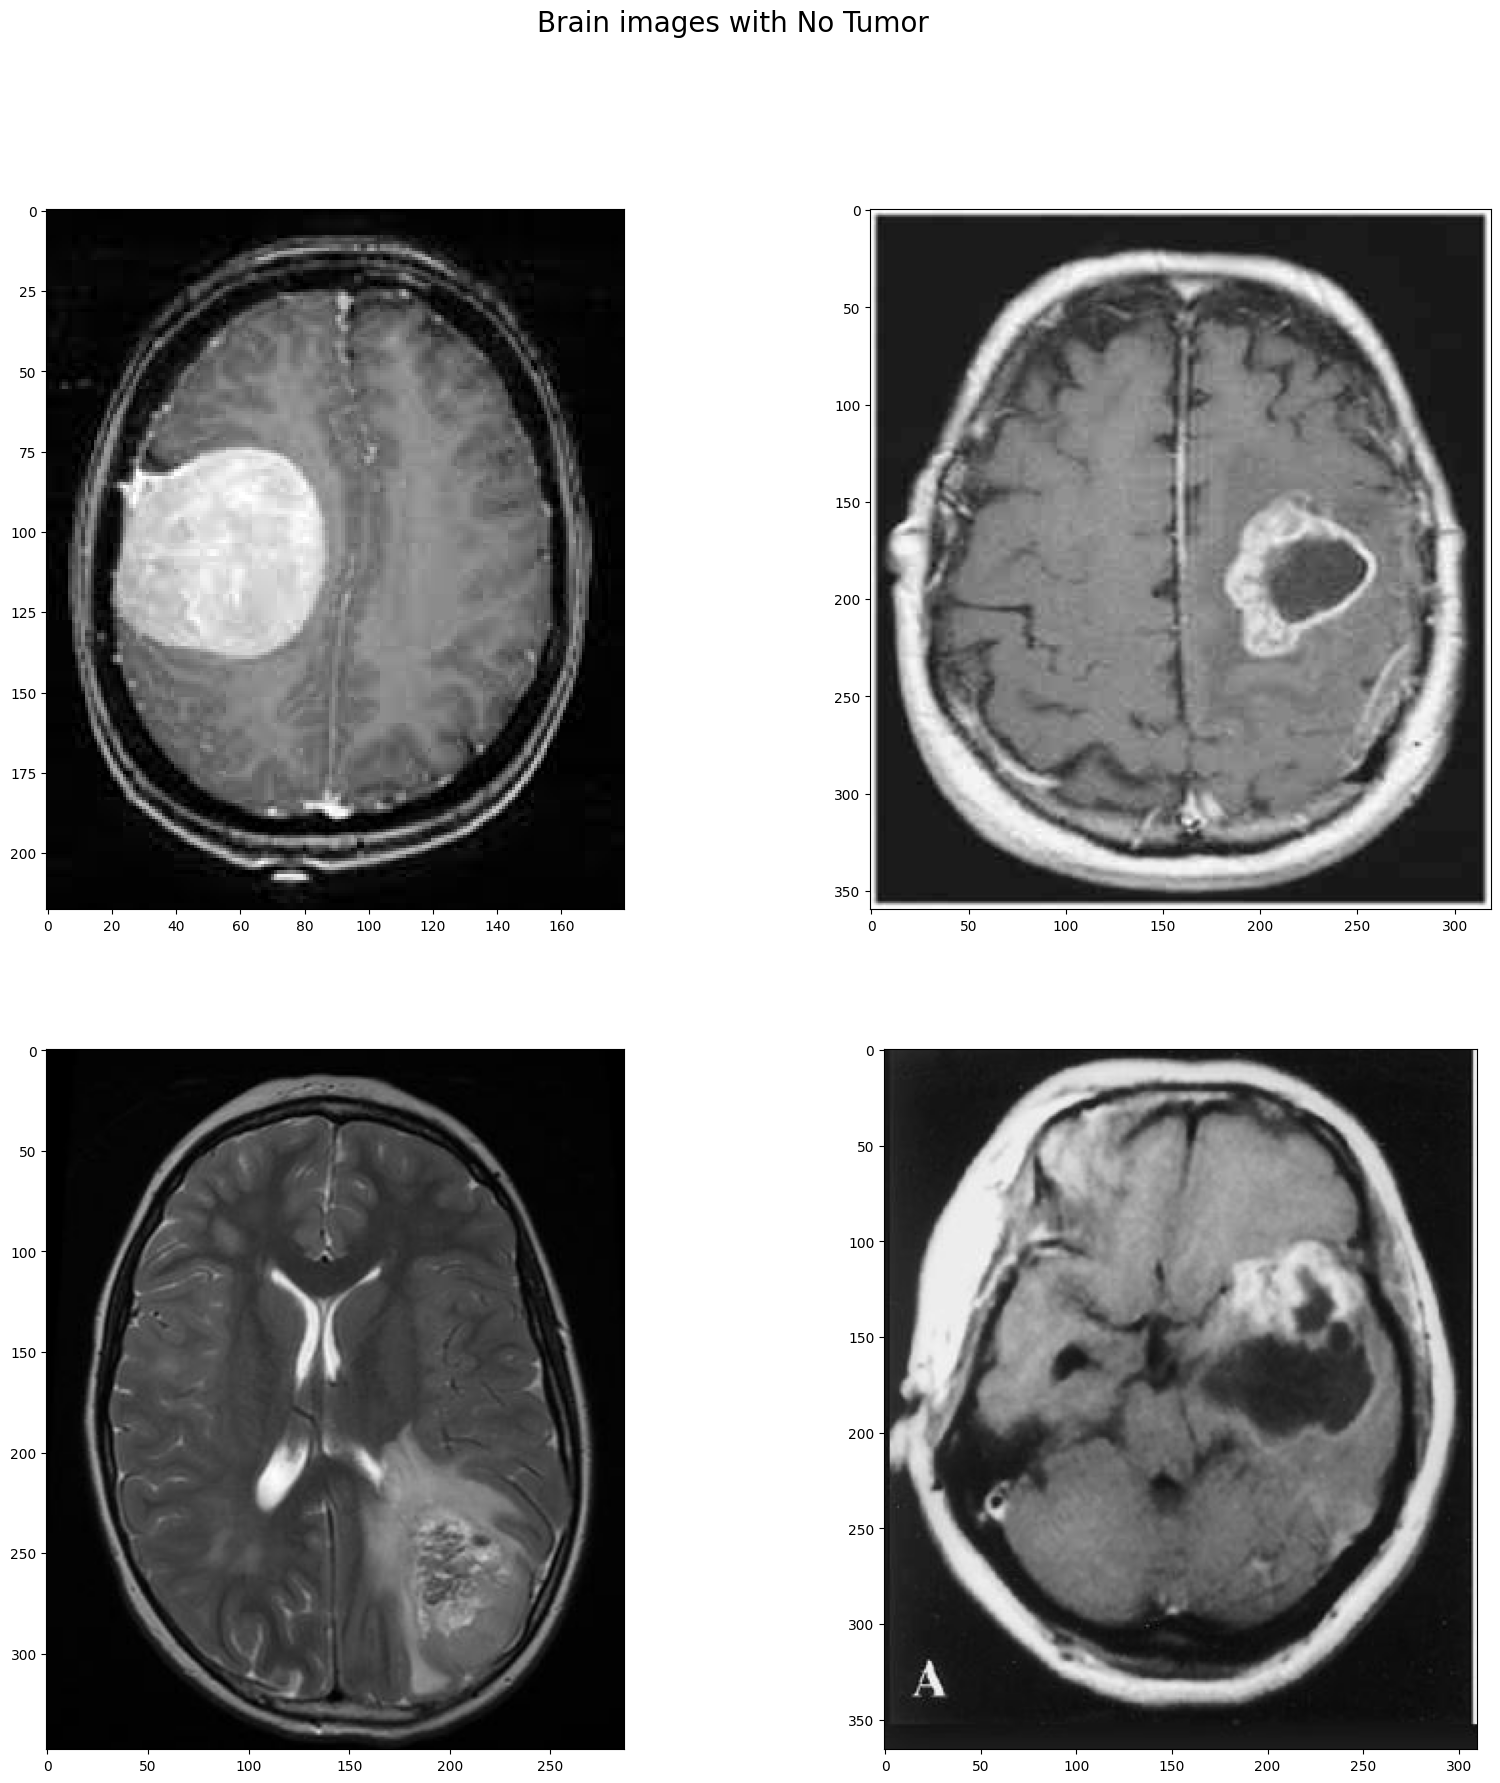

In [ ]:
import cv2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = cv2.imread(folder_path + '/yes/'+ Tumor_Img[i])
    plt.imshow(img)
plt.suptitle("Brain images with No Tumor",fontsize=20)
plt.show()

In [ ]:
classes={'no':0,'yes':1}
x=[]
y=[]
for i in classes:
    path = folder_path + '/' + i
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (240,240),interpolation=cv2.INTER_CUBIC)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        x.append(img)
        y.append(classes[i])

In [ ]:
import numpy as np
x=np.array(x)
y=np.array(y)
x.shape, y.shape

((253, 240, 240), (253,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train = x_train.reshape(-1, 240, 240, 1)
x_test = x_test.reshape(-1, 240, 240, 1)
x_train.shape

(189, 240, 240, 1)

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(240,240,1)),
    keras.layers.Conv2D(32,(4,4),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2),
                              padding='valid'),
    keras.layers.Conv2D(32,(4,4),activation='relu'),
    keras.layers.Conv2D(16,3,activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 238, 238, 64)      640       
                                                                 
 conv2d_5 (Conv2D)           (None, 235, 235, 32)      32800     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 117, 117, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 114, 114, 32)      16416     
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                 

In [ ]:
callbk = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)
my_callbacks = [callbk]

In [ ]:
loss_function=keras.losses.SparseCategoricalCrossentropy(
              from_logits=False,
              ignore_class=None,
              reduction="sum_over_batch_size",
              name="sparse_categorical_crossentropy")

opti = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=Optimizer,
              loss=loss_function,
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=my_callbacks)

Epoch 1/10
6/6 [==============================] - 129s 22s/step - loss: 0.6848 - accuracy: 0.5608 - val_loss: 0.6086 - val_accuracy: 0.8125
Epoch 2/10
6/6 [==============================] - 124s 21s/step - loss: 0.5539 - accuracy: 0.7249 - val_loss: 0.4277 - val_accuracy: 0.8438
Epoch 3/10
6/6 [==============================] - 118s 20s/step - loss: 0.5008 - accuracy: 0.7725 - val_loss: 0.4212 - val_accuracy: 0.8438
Epoch 4/10
6/6 [==============================] - 116s 20s/step - loss: 0.4708 - accuracy: 0.8042 - val_loss: 0.4578 - val_accuracy: 0.7344
Epoch 5/10
6/6 [==============================] - 118s 20s/step - loss: 0.4431 - accuracy: 0.8095 - val_loss: 0.4124 - val_accuracy: 0.8594
Epoch 6/10
6/6 [==============================] - 117s 20s/step - loss: 0.3220 - accuracy: 0.8783 - val_loss: 0.3497 - val_accuracy: 0.8750
Epoch 7/10
6/6 [==============================] - 115s 20s/step - loss: 0.2471 - accuracy: 0.8783 - val_loss: 0.4643 - val_accuracy: 0.8281
Epoch 8/10
6/6 [====

In [ ]:
x=x.reshape(-1,240,240,1)
Model_evaluation = model.evaluate(x, y)
print(f"Loss: {Model_evaluation[0]*100:.2f} %\nAccuracy: {Model_evaluation[1]:.4f}")

8/8 [==============================] - 42s 5s/step - loss: 0.2666 - accuracy: 0.8972
Loss: 26.66 %
Accuracy: 0.8972
